<a href="https://colab.research.google.com/github/harichandananursing/ITC.Assg/blob/main/ANNRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
X=df.drop(columns=['RowNumber','CustomerId','Surname','HasCrCard'])
y=df['HasCrCard']

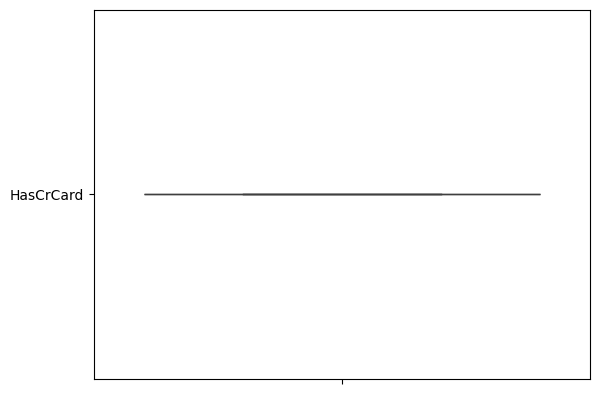

In [10]:
plt.figure()
sns.boxplot('HasCrCard')
plt.show()

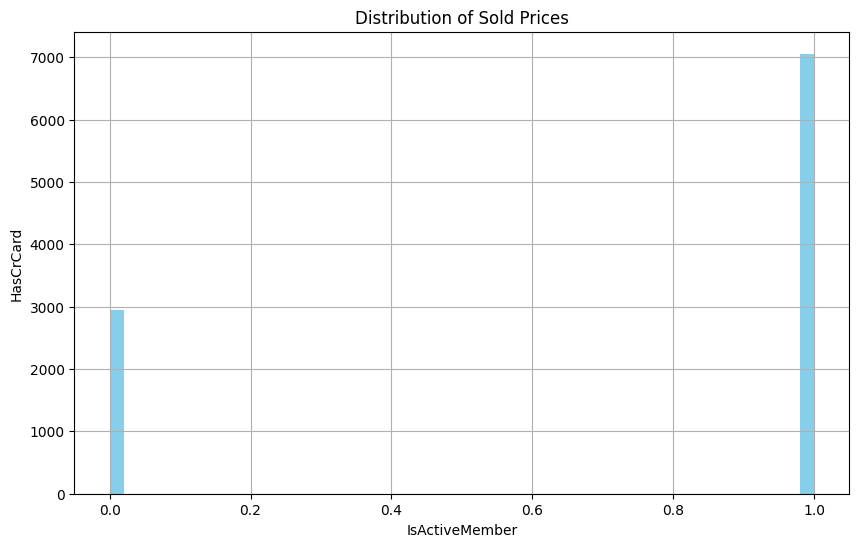

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['HasCrCard'], bins=50, color='skyblue')
plt.title('Distribution of Sold Prices')
plt.xlabel('IsActiveMember')
plt.ylabel('HasCrCard')
plt.grid(True)
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB","#BBBBFF"])

In [14]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1,keepdims=True)

#Loss Functions
def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#Misc
def one_hot(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i, y[i]]=1
  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-(np.mean((y-y_hat)**2)/np.sum((y-y.mean())**2))

In [15]:
def derivative(Z,a):

  if a == linear:
    return 1
  elif a==sigmoid:
    return Z*(1-Z)
  elif a==np.tanh:
    return 1-Z*Z
  elif a==ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation")

In [16]:
class ANN():
  def __init__(self, architecture, activations = None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture) + 1


  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y = one_hot(y)
      K = Y.shape[1]

    N, D = X.shape

    #Initialize weights and Biases
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip(([D]+self.architecture),(self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K], 1)}

    #activations

    if self.activations is None:
      self.a = {1 :ReLU for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)}


    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)
    #gradient descent/ back propogation
    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L])
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])

      # Back Propogation
      dH = (1/N) * (self.Z[self.L]-Y)
      for l in sorted(self.W.keys(), reverse = True):
        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis = 0)

        self.W[l] -= eta*dW
        self.B[l] -= eta*dB

        if l>1:
          dZ = dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel('epochs')
        plt.ylabel('$\mathcal{J}$')
        plt.title('Training Curve')
        plt.show()


  def __forward__(self,X):
    self.Z = {0: X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis = 1)

In [17]:
def main_class():
    D = 2
    K = 3
    N = int(K*1e3)

    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0,-2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0,X1,X2))

    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

    plt.figure()
    plt.scatter(X[:,0],X[:,1], c=y, s=6, alpha=0.6)


    my_ann_classifier = ANN(architecture= [6,4], activations=[np.tanh,ReLU])
    my_ann_classifier.fit(X,y,eta=2e-4,epochs=2e5,show_curve=True)
    y_hat = my_ann_classifier.predict(X)

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f"Training Accuracy:   {accuracy(y,y_hat):0.4f}")

    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)

    xx1, xx2 = np.meshgrid(x1, x2)
    Z = my_ann_classifier.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)

    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=0.2)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_hat,s=6)

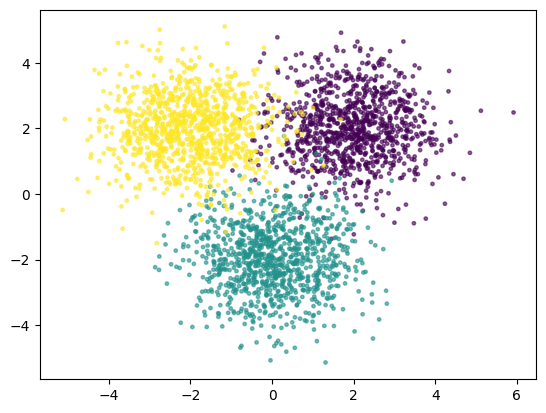

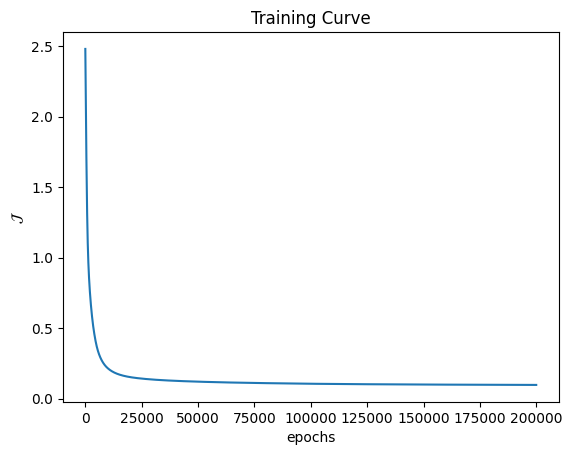

{1: array([[ 0.25149923,  0.22249916, -1.03190364,  0.95332471, -0.97737708,
         0.62096549],
       [ 1.16334012,  0.43123248, -0.15536341, -0.3022036 ,  0.67450808,
        -1.60580468]]), 2: array([[ 0.88045706, -1.69437174, -1.08995189,  0.8629701 ],
       [-0.21827312,  0.66730261,  0.04159149,  0.81821149],
       [-0.04048385,  0.79076718,  1.58090539, -1.21284764],
       [-2.68571688, -0.25070207,  1.91259071, -0.35660228],
       [-0.72524512, -0.44590788, -2.01170266,  0.4297347 ],
       [ 0.24523078,  0.06096252, -0.2585674 ,  0.13552048]]), 3: array([[-2.16020817,  0.19793162,  0.76735751],
       [ 1.10739182, -1.72297108,  1.92992079],
       [-0.91936523,  1.29560506, -0.89548464],
       [ 1.92132988, -1.03127037,  0.417579  ]])}
{1: array([-0.09443563, -0.49445032, -1.34312279,  0.79391248, -1.79163466,
       -0.48195438]), 2: array([ 1.39459775, -2.23521171,  0.62197372,  0.81749346]), 3: array([ 1.07222051, -1.74927071, -0.08429301])}
Training Accuracy:   0.

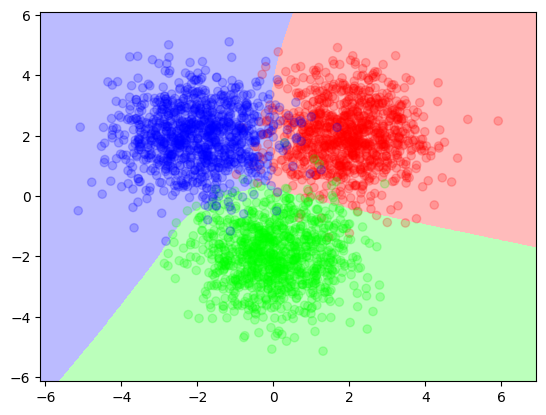

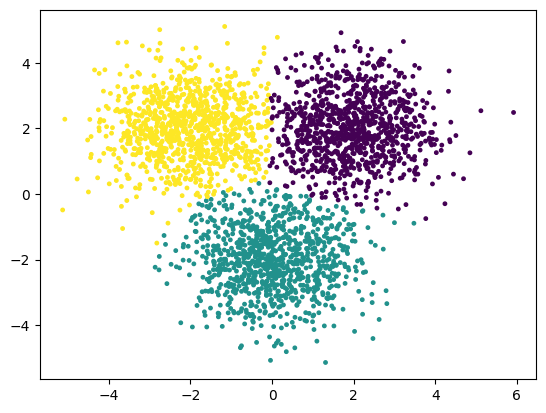

In [18]:
if __name__=="__main__":
  main_class()